**CASO PRÁCTICO 2. APRENDIZAJE POR REFUERZO EN PYTHON**

**Utilizando Dask**

# 1. LECTURA DEL SET DE DATOS

In [102]:
import dask.dataframe as dd
import matplotlib.pyplot as plt

In [103]:
datos=dd.read_csv("creditcard.csv", assume_missing=True)

In [89]:
datos.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [90]:
datos["Class"].value_counts().compute()

0.0    284315
1.0       492
Name: Class, dtype: int64

# 2. ANÁLISIS EXPLORATORIO DE LOS DATOS

<Axes: >

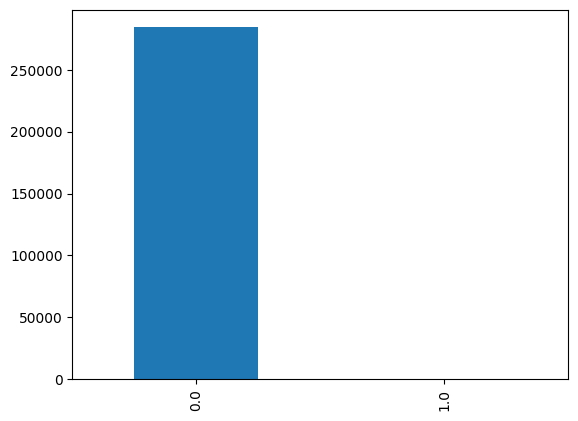

In [91]:
datos["Class"].value_counts().compute().plot(kind="bar")

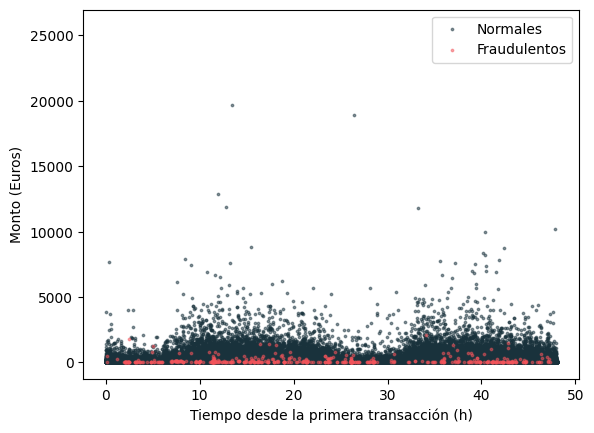

In [92]:
normales = datos[datos.Class==0]
fraudulentos = datos[datos.Class==1]
plt.scatter(normales.Time.compute()/3600, normales.Amount.compute(), 
    alpha = 0.5, c='#19323C', label='Normales', s=3)
plt.scatter(fraudulentos.Time.compute()/3600, fraudulentos.Amount.compute(), 
    alpha = 0.5, c='#F2545B', label='Fraudulentos', s=3)
plt.xlabel('Tiempo desde la primera transacción (h)')
plt.ylabel('Monto (Euros)')
plt.legend(loc='upper right')
plt.show()

<ipython-input-93-a851607dd230>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 1].compute(), bins=50,
<ipython-input-93-a851607dd230>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 0].compute(), bins=50,


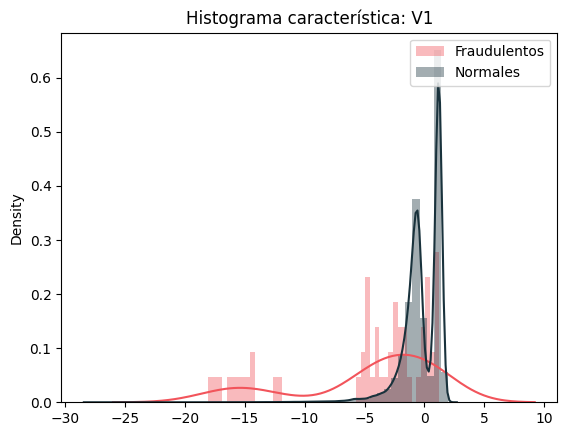

<ipython-input-93-a851607dd230>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 1].compute(), bins=50,
<ipython-input-93-a851607dd230>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 0].compute(), bins=50,


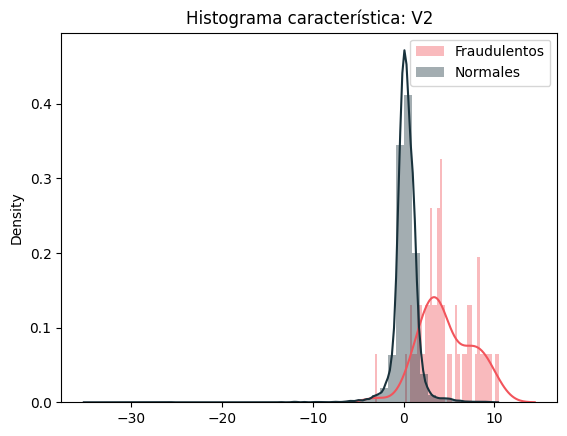

<ipython-input-93-a851607dd230>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 1].compute(), bins=50,
<ipython-input-93-a851607dd230>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 0].compute(), bins=50,


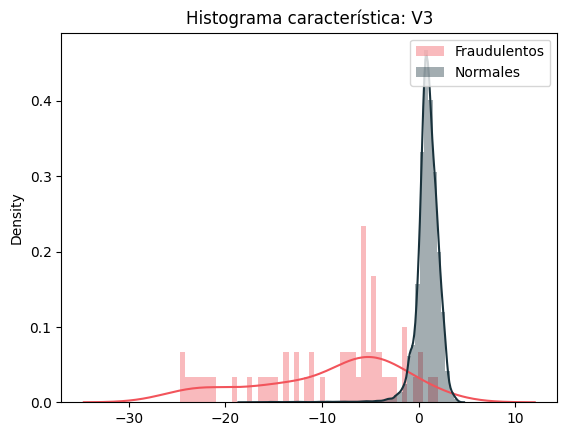

<ipython-input-93-a851607dd230>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 1].compute(), bins=50,
<ipython-input-93-a851607dd230>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 0].compute(), bins=50,


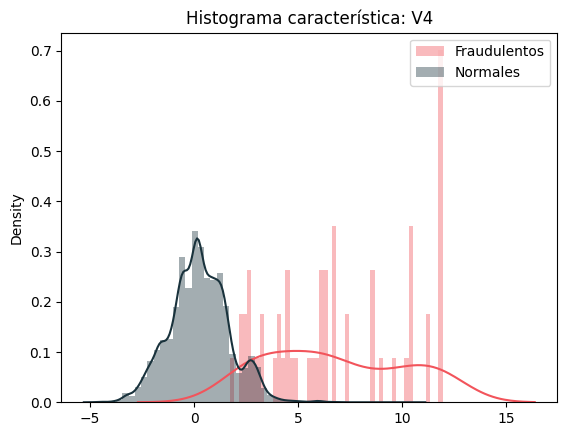

<ipython-input-93-a851607dd230>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 1].compute(), bins=50,
<ipython-input-93-a851607dd230>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 0].compute(), bins=50,


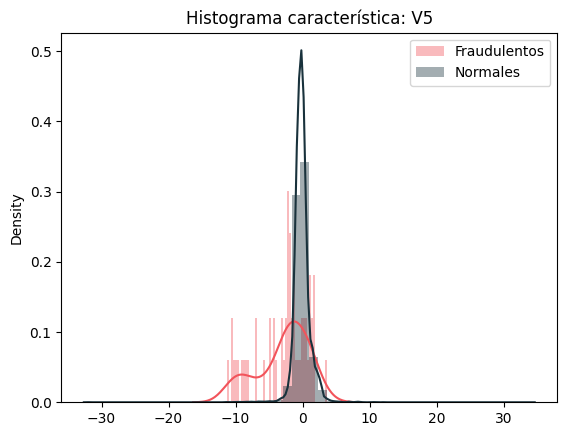

<ipython-input-93-a851607dd230>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 1].compute(), bins=50,
<ipython-input-93-a851607dd230>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 0].compute(), bins=50,


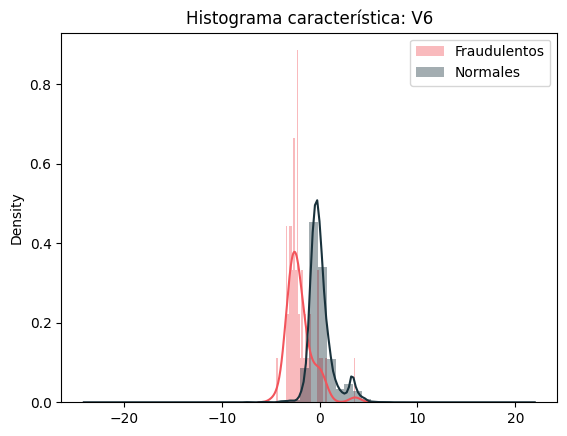

<ipython-input-93-a851607dd230>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 1].compute(), bins=50,
<ipython-input-93-a851607dd230>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 0].compute(), bins=50,


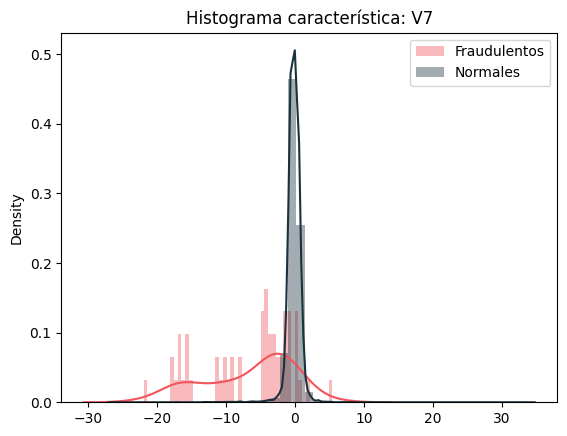

<ipython-input-93-a851607dd230>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 1].compute(), bins=50,
<ipython-input-93-a851607dd230>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 0].compute(), bins=50,


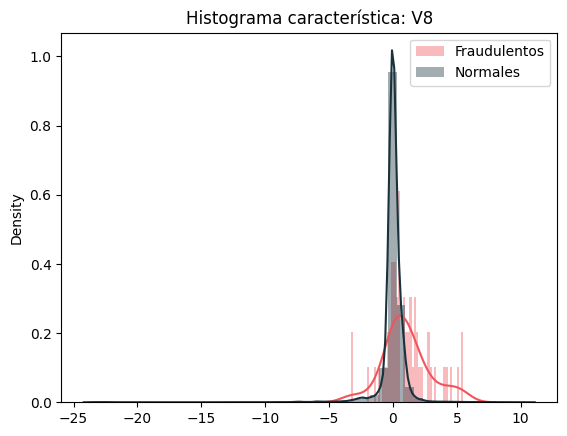

<ipython-input-93-a851607dd230>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 1].compute(), bins=50,
<ipython-input-93-a851607dd230>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 0].compute(), bins=50,


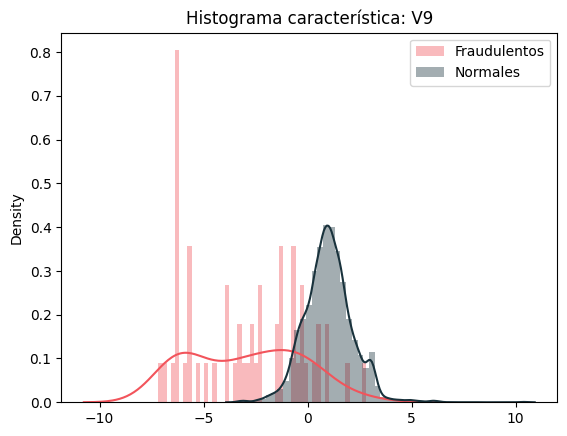

<ipython-input-93-a851607dd230>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 1].compute(), bins=50,
<ipython-input-93-a851607dd230>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 0].compute(), bins=50,


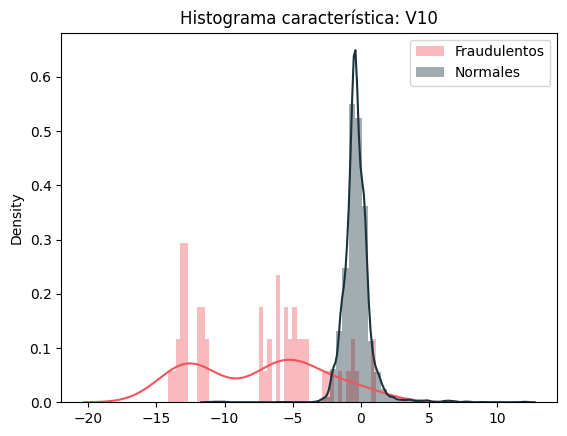

<ipython-input-93-a851607dd230>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 1].compute(), bins=50,
<ipython-input-93-a851607dd230>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 0].compute(), bins=50,


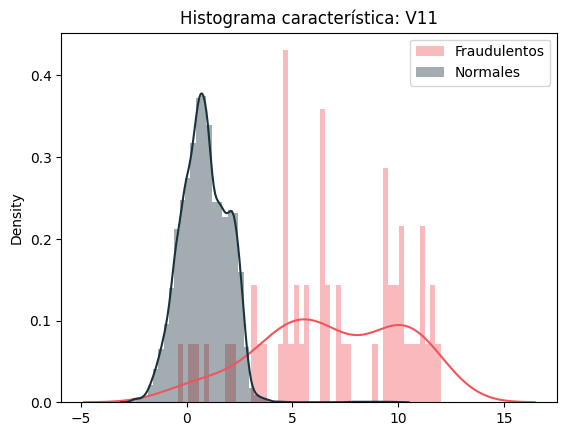

<ipython-input-93-a851607dd230>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 1].compute(), bins=50,
<ipython-input-93-a851607dd230>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 0].compute(), bins=50,


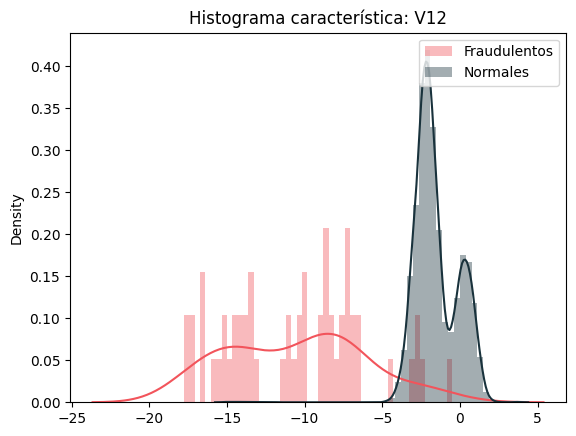

<ipython-input-93-a851607dd230>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 1].compute(), bins=50,
<ipython-input-93-a851607dd230>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 0].compute(), bins=50,


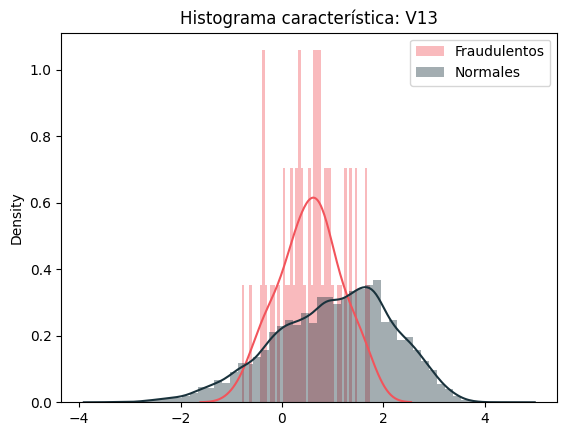

<ipython-input-93-a851607dd230>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 1].compute(), bins=50,
<ipython-input-93-a851607dd230>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 0].compute(), bins=50,


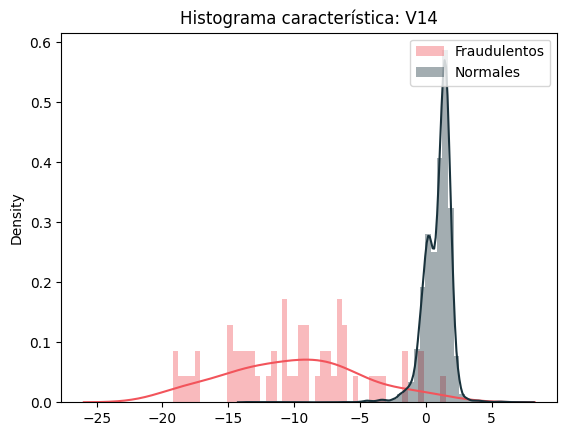

<ipython-input-93-a851607dd230>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 1].compute(), bins=50,
<ipython-input-93-a851607dd230>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 0].compute(), bins=50,


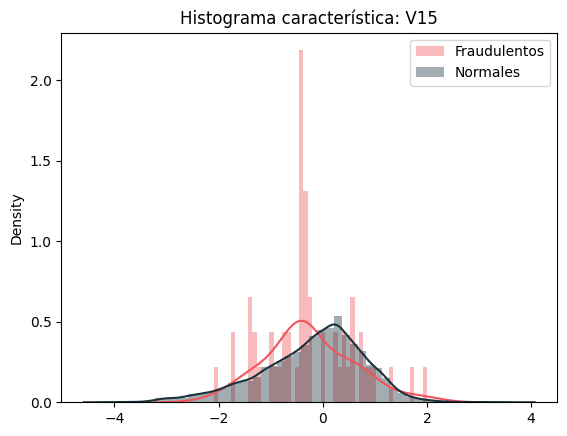

<ipython-input-93-a851607dd230>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 1].compute(), bins=50,
<ipython-input-93-a851607dd230>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 0].compute(), bins=50,


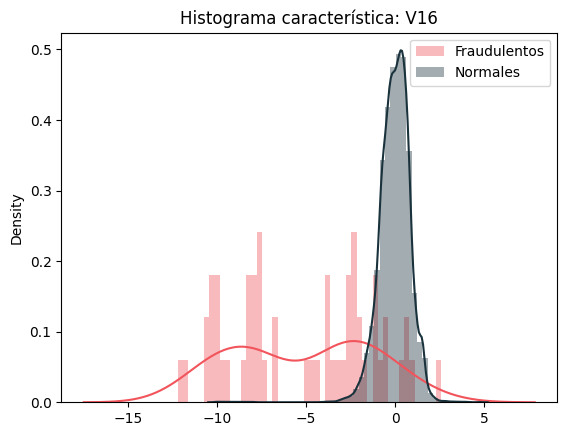

<ipython-input-93-a851607dd230>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 1].compute(), bins=50,
<ipython-input-93-a851607dd230>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 0].compute(), bins=50,


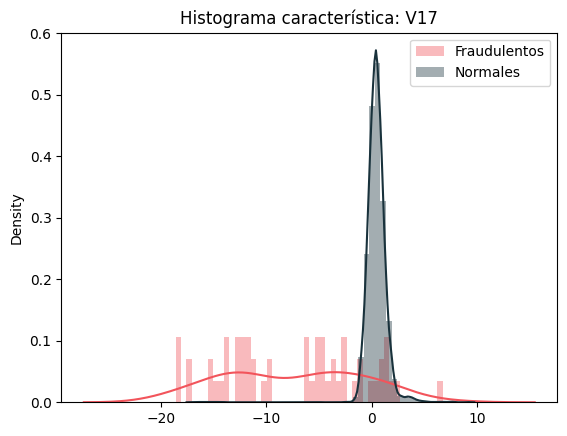

<ipython-input-93-a851607dd230>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 1].compute(), bins=50,
<ipython-input-93-a851607dd230>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 0].compute(), bins=50,


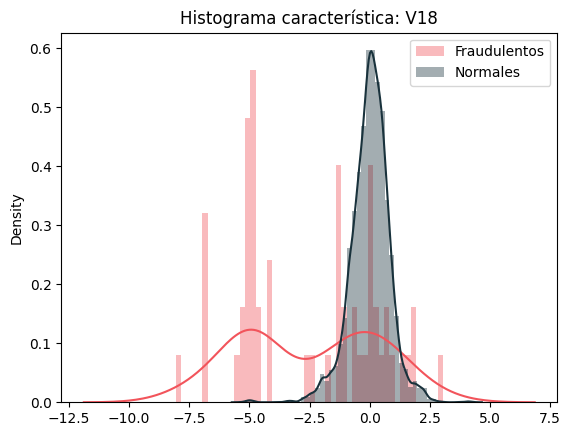

<ipython-input-93-a851607dd230>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 1].compute(), bins=50,
<ipython-input-93-a851607dd230>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 0].compute(), bins=50,


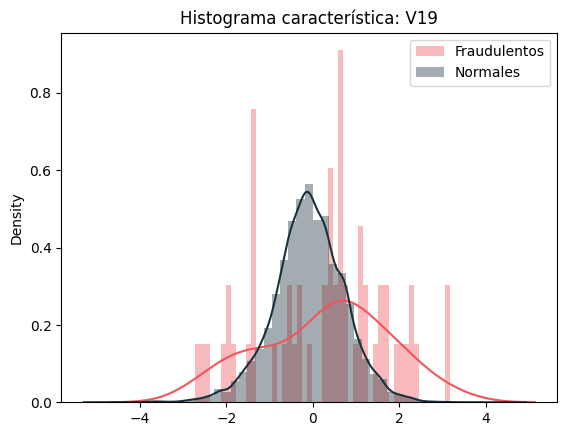

<ipython-input-93-a851607dd230>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 1].compute(), bins=50,
<ipython-input-93-a851607dd230>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 0].compute(), bins=50,


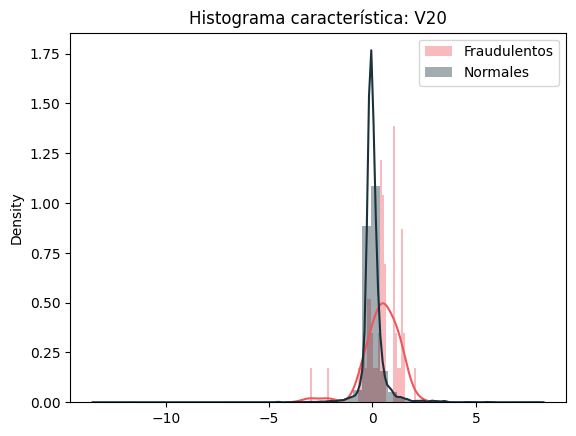

<ipython-input-93-a851607dd230>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 1].compute(), bins=50,
<ipython-input-93-a851607dd230>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 0].compute(), bins=50,


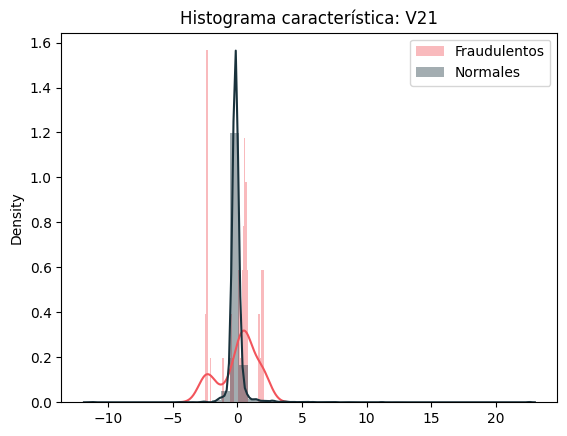

<ipython-input-93-a851607dd230>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 1].compute(), bins=50,
<ipython-input-93-a851607dd230>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 0].compute(), bins=50,


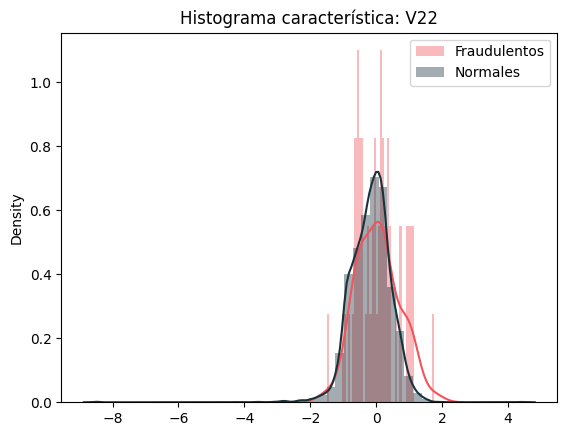

<ipython-input-93-a851607dd230>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 1].compute(), bins=50,
<ipython-input-93-a851607dd230>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 0].compute(), bins=50,


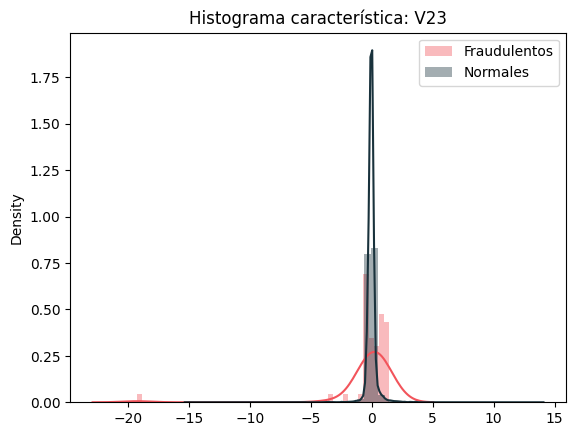

<ipython-input-93-a851607dd230>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 1].compute(), bins=50,
<ipython-input-93-a851607dd230>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 0].compute(), bins=50,


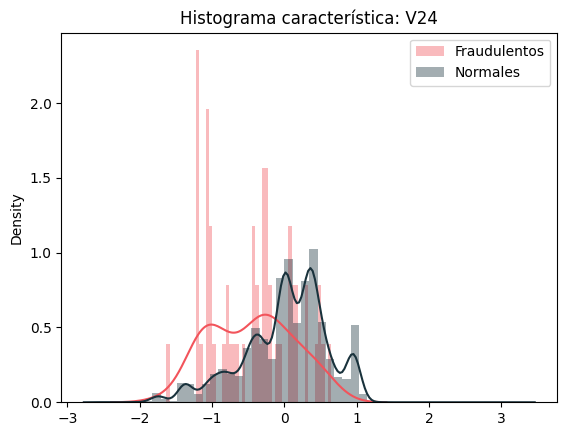

<ipython-input-93-a851607dd230>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 1].compute(), bins=50,
<ipython-input-93-a851607dd230>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 0].compute(), bins=50,


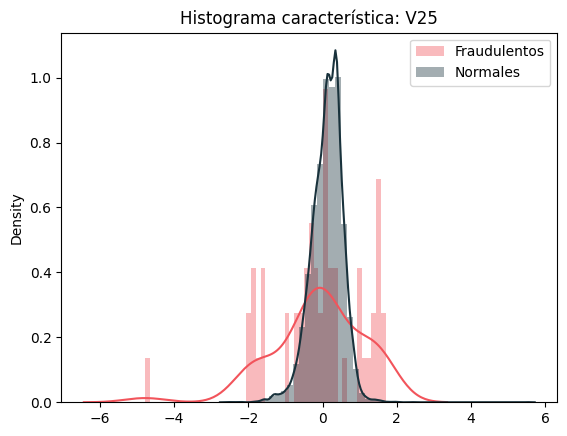

<ipython-input-93-a851607dd230>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 1].compute(), bins=50,
<ipython-input-93-a851607dd230>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 0].compute(), bins=50,


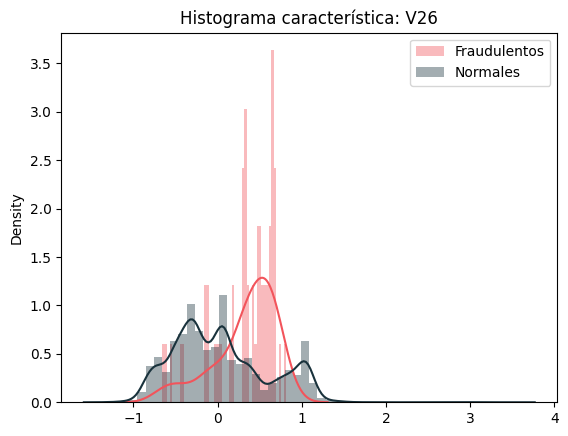

<ipython-input-93-a851607dd230>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 1].compute(), bins=50,
<ipython-input-93-a851607dd230>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 0].compute(), bins=50,


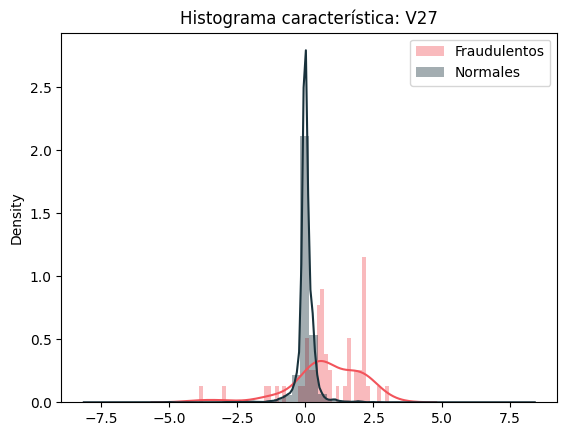

<ipython-input-93-a851607dd230>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 1].compute(), bins=50,
<ipython-input-93-a851607dd230>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datos2[cn][datos2.Class == 0].compute(), bins=50,


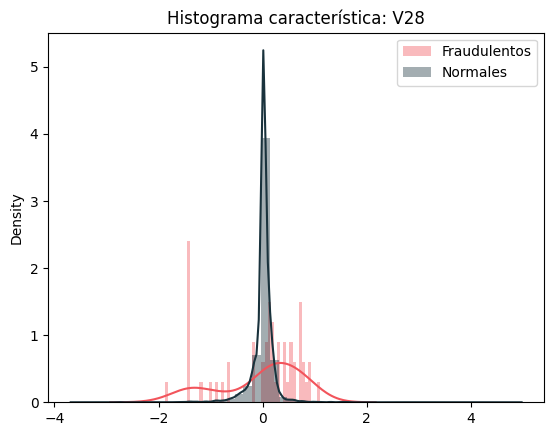

In [93]:
import matplotlib.gridspec as gridspec
import seaborn as sns

v_1_28 = datos2.iloc[:,1:29].columns
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(datos2[v_1_28]):
    sns.distplot(datos2[cn][datos2.Class == 1].compute(), bins=50, 
        label='Fraudulentos', color='#F2545B')
    sns.distplot(datos2[cn][datos2.Class == 0].compute(), bins=50, 
        label='Normales', color='#19323C')
    plt.xlabel('')
    plt.title('Histograma característica: ' + str(cn))
    plt.legend(loc='upper right')
    plt.show()

# 3. PRE-*PROCESAMIENTO*

In [104]:
print(datos.isnull().sum())

Dask Series Structure:
npartitions=1
Amount    int64
V9          ...
dtype: int64
Dask Name: dataframe-sum-agg, 4 graph layers


In [105]:
# Reemplazar los valores faltantes en la columna 'Amount' con el valor medio de la columna
datos['Amount'] = datos['Amount'].fillna(datos['Amount'].mean())

In [ ]:
import dask.dataframe as dd
from dask_ml.preprocessing import StandardScaler
from dask_ml.model_selection import train_test_split

# 3.1 La variable "Tiempo" no aporta información. La eliminaremos
datos = datos.drop(['Time'], axis=1)
datos['Amount'] = StandardScaler().fit_transform(datos['Amount'].values.reshape(-1,1))

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, Y_test = train_test_split(datos, datos['Class'], test_size=0.2, random_state=42)

# Seleccionar solo las filas con etiqueta de clase 0 en el conjunto de entrenamiento
X_train = X_train[X_train.Class == 0]

# Eliminar la columna 'Class' del conjunto de entrenamiento y prueba
X_train = X_train.drop(['Class'], axis=1)
X_train = X_train.values
X_test = X_test.drop(['Class'], axis=1)
X_test = X_test.values

# 4. AUTOENCODER: 29-20-14-20-29, tanh-relu-tanh-relu

In [ ]:
import dask.array as da
from dask.distributed import Client
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.optimizers import SGD

In [ ]:
#Se puede establecer una conexión con un clúster de Dask usando el cliente Dask. Esto puede ser opcional si
#no se está utilizando un clúster Dask y se desea utilizar la ejecución en paralelo en la misma máquina.
client = Client()

In [ ]:
#Convertimos las matrices NumPy en matrices Dask
X_train_dask = da.from_array(X_train, chunks=1000)
X_test_dask = da.from_array(X_test, chunks=1000)

In [ ]:
#Definimos las capas de entrada y salida
dim_entrada = X_train.shape[1]          # 29
capa_entrada = Input(shape=(dim_entrada,))

In [ ]:
#Definimos las capas del codificador y decodificador
encoder = Dense(20, activation='tanh')(capa_entrada)
encoder = Dense(14, activation='relu')(encoder)

decoder = Dense(20, activation='tanh')(encoder)
decoder = Dense(29, activation='relu')(decoder)

In [ ]:
#Creamos el modelo autoencoder utilizando la API funcional de Keras
autoencoder = Model(inputs=capa_entrada, outputs=decoder)

In [ ]:
#Compilamos el modelo utilizando el optimizador SGD y la pérdida de MSE
sgd = SGD(lr=0.01)
autoencoder.compile(optimizer='sgd', loss='mse')

In [ ]:
#Entrenamos el modelo utilizando el método 'fit' de Dask y se utiliza el método 'persist' para asegurarse de que
#los datos se almacenen en memoria
nits = 100
tam_lote = 32
autoencoder = autoencoder.fit(X_train_dask, X_train_dask, epochs=nits, batch_size=tam_lote, shuffle=True, validation_data=(X_test_dask,X_test_dask), verbose=1)
autoencoder = autoencoder.persist()

In [ ]:
#Finalmente, cerramos la conexión del cliente Dask
client.close()

# 5. VALIDACIÓN

In [ ]:
# Predicción X_test -> Autoencoder -> X_pred
X_pred = autoencoder.predict(X_test.compute())  # Calcular la predicción con la función compute() para obtener un array de Numpy
ecm = np.mean(np.power(X_test.compute()-X_pred,2), axis=1)
print(X_pred.shape)

# Gráfica precision-recall para determinar el umbral
precision, recall, umbral = precision_recall_curve(Y_test.compute(), ecm)

plt.plot(umbral, precision[1:], label="Precision",linewidth=5)
plt.plot(umbral, recall[1:], label="Recall",linewidth=5)
plt.title('Precision y Recall para diferentes umbrales')
plt.xlabel('Umbral')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

# 5.3. Matriz de confusión
umbral_fijo = 0.75
Y_pred = da.from_array(np.array([1 if e > umbral_fijo else 0 for e in ecm]), chunks=ecm.shape)

conf_matrix = confusion_matrix(Y_test.compute(), Y_pred.compute())
print(conf_matrix)